### Project 1: 3D to 2D Projection
#### Objective: Use PCA to project a set of 3D data points onto a 2D plane. 
#### Technique: Create a 3D dataset, calculate its covariance matrix, find the top two eigenvectors, and then multiply the data by the matrix of these two eigenvectors. 


##### Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Axes3D → enables 3D plots with Matplotlib

##### Step 2: Create fake 3D data

In [2]:
np.random.seed(42)
data_3d = np.random.randn(100, 3) # 100 points, 3 features (X, Y, Z)

# Creates 100 random points with 3 coordinates each → (x, y, z)
# np.random.seed(42) just ensures results are the same every time you run it

##### Step 3: Center the data (subtract the mean)

In [7]:
mean = np.mean(data_3d, axis=0)
centered_data = data_3d - mean

# np.mean(..., axis=0) finds the average value of each column (pixel column mean)
# Subtracting it (data_3d - mean) centers the data → mean becomes 0

##### Step 4: Compute the covariance matrix

In [8]:
cov_matrix = np.cov(centered_data, rowvar=False)

# The covariance matrix shows how pixel values vary together
# This matrix helps PCA find directions (patterns) of maximum variation
# rowvar=False - When doing PCA, we need the covariance matrix to describe relationships between features, not between rows
# Which pixel combinations carry the most information

##### Step 5: Find eigenvalues and eigenvectors

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Eigenvectors → directions of maximum variance (new axes)
# Eigenvalues → how important each direction is (how much variance it captures)

##### Step 6: Sort eigenvectors

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Keeps the most important axes (those with largest eigenvalues) first.
# [::-1] → reverses that order to descending
# [:, sorted_indices] - : → means “all rows” (i.e., the full eigenvector values), sorted_indices → selects columns in the new order


##### Step 7: Take top 2 components

In [11]:
top_2_eigenvectors = eigenvectors[:, :2]

# only want 2D (2 axes)
# top_2_eigenvectors → shape (3, 2)-going from 3D → 2D
# : means take all rows, :2 means take the first 2 columns

##### Step 8: Project 3D → 2D

In [ ]:
data_2d = centered_data @ top_2_eigenvectors

# matrix multiplication - (100×3) × (3×2) = (100×2)

##### Step 9: Visualization

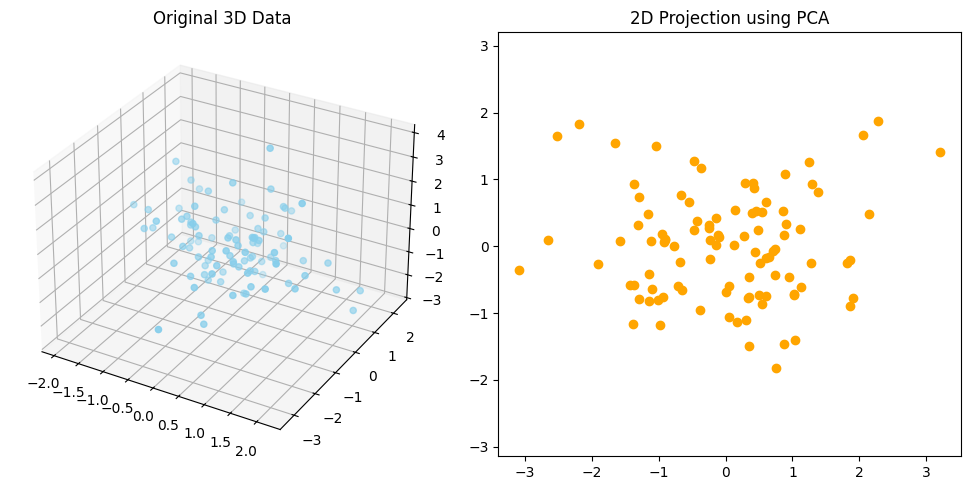

In [ ]:
fig = plt.figure(figsize=(10, 5))

# Left Plot — 3D
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], color='skyblue') # : - all rows, 0 - columns
ax.set_title("Original 3D Data")

# Right Plot — 2D
plt.subplot(1, 2, 2)
plt.scatter(data_2d[:, 0], data_2d[:, 1], color='orange') # : - all rows, 0 - columns
plt.title("2D Projection using PCA")
plt.axis('equal')

plt.tight_layout()
plt.show()
